In [1]:
!pip install aicrowd-cli

%load_ext aicrowd.magic

In [2]:
%aicrowd login

Please login here: https://api.aicrowd.com/auth/k8Raw6fwJxHkdCYG55WBdpTZOsIK5U5mKlZeamHv_f0
API Key valid
Saved API Key successfully!


In [3]:
# Downloading the Dataset
!rm -rf data
!mkdir data
%aicrowd ds dl -c starship-detection -o data

data.zip:   0%|          | 0.00/34.1M [00:00<?, ?B/s]

In [4]:
!unzip data/data.zip -d /content/images >> /dev/null

replace /content/images/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [5]:
# Image Reading & Preprocessing
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Misc.
import pandas as pd
from tqdm.notebook import tqdm
import os
from natsort import natsorted

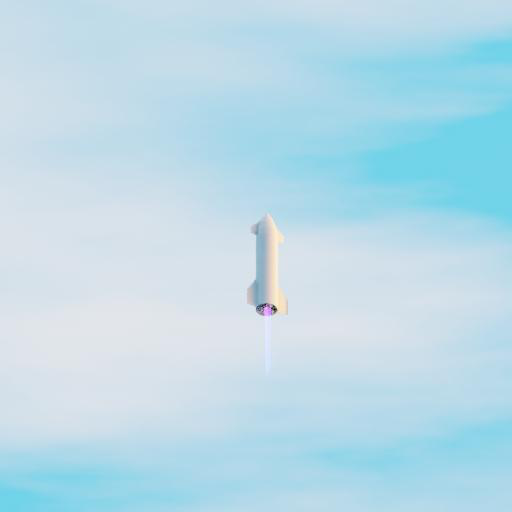

In [6]:
# Reading a Sample Image
img = Image.open("images/2.jpg")
img

(512, 512, 3)


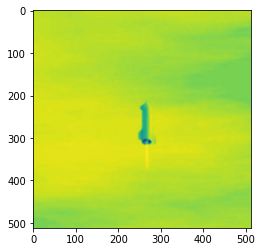

In [7]:
# Converting the image to numpy array 
np_img = np.array(img)
np_img = cv2.GaussianBlur(np_img, (7,7),0)
# p1 = cv2.pyrDown(np_img)
# p2 = cv2.pyrDown(p1)
# p3 = cv2.pyrUp(p2)
# np_img = cv2.pyrUp(p3)
print(np_img.shape)
gray = cv2.cvtColor(np_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [9]:
canny = cv2.Canny(gray, 10, 50)
# plt.imshow(canny)
# cv2_imshow(canny)

10


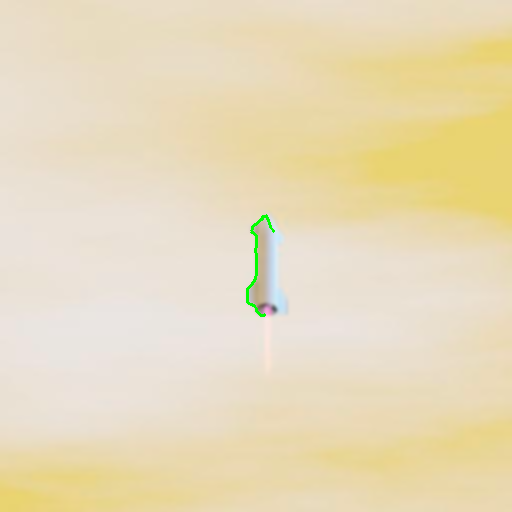

In [10]:
# Finding contours in the image
from google.colab.patches import cv2_imshow

contours, hierarchy = cv2.findContours(canny, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours))
# Sorting the contours in ascending order
contours = sorted(contours, key=cv2.contourArea,reverse=True)
cv2.drawContours(np_img, contours[0],-1,(0,255,0),2)
cv2_imshow(np_img)

In [11]:
# Getting the bounding boxes of the biggest contours
x,y,w,h = list(cv2.boundingRect(contours[0]))
x,y,w,h

(247, 215, 27, 101)

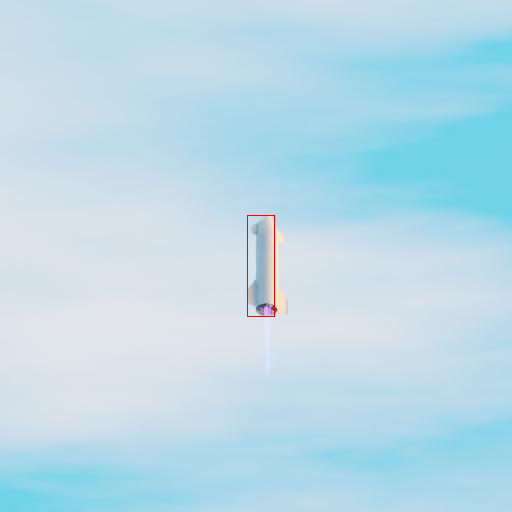

In [12]:
# Showing the contour
draw_img = img.copy()
draw = ImageDraw.Draw(draw_img)
draw.rectangle([x, y, x+w, y+h], outline ="red")
draw_img

So as you can see, fnding contours did a pretty great job in finfing the starship body. However there are some mistakes with the image in such as the more right side of the starship body in left unchecked.

In [13]:
# Getting all the testing images 
test_imgs = natsorted(os.listdir("images"))
print(len(test_imgs))

10000


In [14]:
# Function to generate the bounding boxes
def gen_bounding_boxes(img):

  # Converting the image to numpy array 
  img = np.array(img)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Getting the edges
  canny = cv2.Canny(gray, 100, 150)

  # Getting the contours
  contours, hierarchy = cv2.findContours(canny, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  # Sorting the contours
  contours = sorted(contours, key=cv2.contourArea)

  try:
    # Return the boundong boxes of the biggest contour
    x,y,w,h = list(cv2.boundingRect(contours[-1]))
  
  # Incase no countous found
  except:
    x,y,w,h = [1, 1, 1, 1]

  return x,y,w,h

In [15]:
bboxes = []
image_ids = []

# Ground through each test image
for img_name in tqdm(test_imgs):

  # Reading the test image
  img = Image.open(os.path.join("images", img_name))

  # Generating the bounding boxes
  x,y,w,h = gen_bounding_boxes(img)

  # Adding the boundong boxes and image id
  bboxes.append([x,y,w,h])
  image_ids.append(int(img_name.split(".")[0]))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [16]:
# Adding the image id and bounding boxes to a dataframe
df = pd.DataFrame({"ImageID":image_ids, "bbox":bboxes})
df = df.sort_values("ImageID").reset_index(drop=True)
df

,ImageID,bbox
0,0,"[180, 304, 7, 9]"
1,1,"[273, 228, 128, 42]"
2,2,"[246, 231, 26, 85]"
3,3,"[204, 243, 168, 33]"
4,4,"[346, 301, 9, 17]"
...,...,...
9995,9995,"[191, 240, 196, 18]"
9996,9996,"[180, 245, 71, 21]"
9997,9997,"[96, 212, 207, 76]"
9998,9998,"[157, 242, 24, 77]"


In [17]:
!rm -rf assets
!mkdir assets

df.to_csv(os.path.join("assets", "submission.csv"), index=False)

In [19]:
!aicrowd notebook submit -c starship-detection -a assets --no-verify

Using notebook: /content/drive/MyDrive/Colab Notebooks/Copy of [Getting Started Code] Starship Detection for submission...
Removing existing files from submission directory...
Scrubbing API keys from the notebook...
submission.zip ━━━━━━━━━━━━━━━━━━━━ 100.0% • 707.6/705.9 KB • 1.2 MB/s • 0:00:00
                                                  ╭─────────────────────────╮                                                   
                                                  │ Successfully submitted! │                                                   
                                                  ╰─────────────────────────╯                                                   
                                                        Important links                                                         
┌──────────────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai